<a href="https://colab.research.google.com/github/ryanleeallred/Job_Listing_NLP/blob/master/DS_Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import re
import matplotlib.pyplot as plt

In [39]:
from google.colab import files
uploaded = files.upload()

Saving DS_Listings.csv to DS_Listings (1).csv


In [43]:
df = pd.read_csv('DS_Listings.csv')

print(df.shape)
df.head()

(613, 6)


,title,company,location,meta,description,url
0,Data Scientist - Entry Level,Pathrise,Remote,NaN,What is Pathrise?\nPathrise (YC W18) is an onl...,http://www.indeed.com/rc/clk?jk=602196c5ea2f32...
1,Data Scientist I,"Intrepid Solutions and Services, LLC",Remote,NaN,CLEARANCE: None\nFUNCTIONAL LABOR CATEGORY: Da...,http://www.indeed.com/rc/clk?jk=3906747a8097e3...
2,DATA SCIENTIST I,BBVA,"Houston, TX",NaN,Company: Compass Bank dba BBVA Compass\nLocati...,http://www.indeed.com/rc/clk?jk=4759d0bdb66014...
3,Data Scientist,Proofpoint,"Sunnyvale, CA 94085",NaN,It's fun to work in a company where people tru...,http://www.indeed.com/rc/clk?jk=44d81949affdc9...
4,Data Scientist,Degreed,Remote,NaN,Degreed is the upskilling platform that connec...,http://www.indeed.com/rc/clk?jk=c73a76937d8a17...


In [44]:
def clean_description(description):
  # All whitespace to single space
  description = ' '.join(description.split())
  # Accept one or more copies of punctuation
  # plus zero or more copies of a space
  # and replace it with a single space
  description = re.sub(r"""
               [-,.;@#?!&$:()/'"]+  
               \ *           
               """,
               " ",          
               description, flags=re.VERBOSE)
  return description

In [45]:
DS = listing_df.drop('meta', axis=1)
DS = DS.dropna()
DS['cleaned'] = DS['description'].apply(clean_description)
DS['cleaned'] = DS['cleaned'].str.lower()

DS.head()

,title,company,location,description,url,cleaned
0,Data Scientist - Entry Level,Pathrise,Remote,What is Pathrise?\nPathrise (YC W18) is an onl...,http://www.indeed.com/rc/clk?jk=602196c5ea2f32...,what is pathrise pathrise yc w18 is an online...
1,Data Scientist I,"Intrepid Solutions and Services, LLC",Remote,CLEARANCE: None\nFUNCTIONAL LABOR CATEGORY: Da...,http://www.indeed.com/rc/clk?jk=3906747a8097e3...,clearance none functional labor category data ...
2,DATA SCIENTIST I,BBVA,"Houston, TX",Company: Compass Bank dba BBVA Compass\nLocati...,http://www.indeed.com/rc/clk?jk=4759d0bdb66014...,company compass bank dba bbva compass location...
3,Data Scientist,Proofpoint,"Sunnyvale, CA 94085",It's fun to work in a company where people tru...,http://www.indeed.com/rc/clk?jk=44d81949affdc9...,it s fun to work in a company where people tru...
4,Data Scientist,Degreed,Remote,Degreed is the upskilling platform that connec...,http://www.indeed.com/rc/clk?jk=c73a76937d8a17...,degreed is the upskilling platform that connec...


In [46]:
DS.isnull().sum()

title          0
company        0
location       0
description    0
url            0
cleaned        0
dtype: int64

In [97]:
search_strings = {'agile': ['agile'],
                  "algorithm": ['algorithm'],
                  "analysis": ["analysis"],
                  "analyst": ["analyst"],
                  'analytics': ['analytics'],
                  'artificial intelligence': ['artificial intelligence', ' ai '],
                  'aws': [' aws ', 'amazon web services'],
                  'bachelor': ['bachelor'],
                  'big data': ['big data'],
                  'cloud': ['cloud'],
                  'dashboard': ['dashboard'],
                  'database': ['database', ' db '],
                  "deep learning": ['deep learning'],
                  "degree": ["degree"],
                  'developer': ['developer'],
                  'economics': ['economics'],
                  'excel': ['excel'],
                  'experiment': ['experiment'],
                  'experimental': ['experimental'],
                  "hadoop": ['hadoop'],
                  'hive': ['hive'],
                  'java': ['java'],
                  'junior': ['junior'],
                  "machine learning": ['machine learning', ' ml '],
                  'masters': ['masters', 'ms degree', 'masters degree'],
                  'math': [' math ', 'mathematical', 'mathematics'],
                  "numpy": ["numpy"],
                  "pandas": ["pandas"],
                  "python": ["python"],
                  'r': [' r '],
                  'report': ['report'],
                  'scala': ['scala'],
                  'senior': ['senior'],
                  "spark": ['spark', 'pyspark'],
                  "sql": ['sql'],
                  'statistics': ['statistics', 'statistical'],
                  'tableau': ['tableau'],
                  "time series": ['time series'],
                  }

In [98]:
# New Dataframe
string_dataframe = DS[['title', 'cleaned']]

print(string_dataframe.shape)
string_dataframe.head()

(601, 2)


,title,cleaned
0,Data Scientist - Entry Level,what is pathrise pathrise yc w18 is an online...
1,Data Scientist I,clearance none functional labor category data ...
2,DATA SCIENTIST I,company compass bank dba bbva compass location...
3,Data Scientist,it s fun to work in a company where people tru...
4,Data Scientist,degreed is the upskilling platform that connec...


In [99]:
def in_description(description, strings):
  found = False
  for string in strings:
    if string in description:
      found =  True
  return found

in_description(string_dataframe['cleaned'][0], ['pathrise'])

for key in search_strings:
  found_list = []
  for listing in string_dataframe['cleaned']:
    found_list.append(in_description(listing, search_strings[key]))
  string_dataframe[key] = found_list

# string_dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


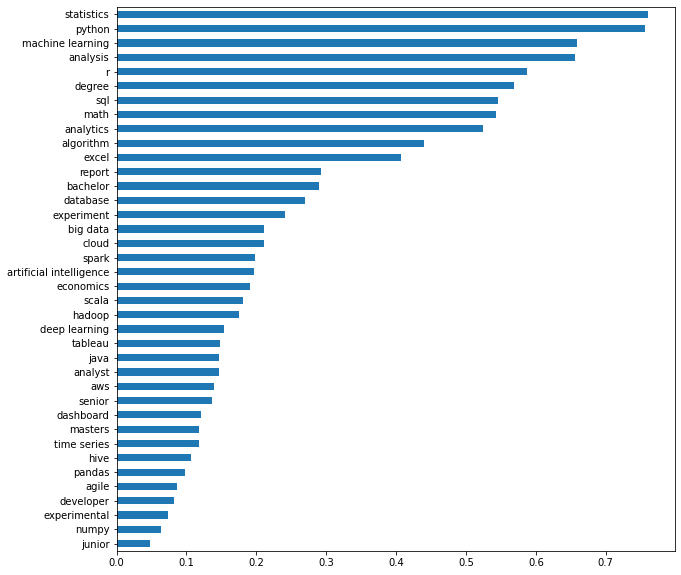

In [100]:
terms = string_dataframe.drop(['title', 'cleaned'], axis=1)

(terms.sum() / len(string_dataframe)).sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

plt.show()